In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [15]:
import sys
sys.path.append(r'C:\git\smartdata')

import smartdata
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff
from smartdata.utils.common import to_namedtuple
from smartdata.utils.file import read_from_json, create_file_name
from smartdata import SmartData

In [16]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [17]:
from datetime import datetime, date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time

In [18]:
from gmt.fom.gas.shared.utils.common import *
from gmt.fom.gas.shared.utils.dframe import *

In [19]:
from gmt.fom.gas.shared.models.stpb.stpb import ShortTermPowerBurnModel
from gmt.fom.gas.shared.models.stpb.data.mongo import MongoAdapter

In [20]:
figsize=(8*1.6, 8)

## Retrieving from Mongo

In [21]:
myData = MongoAdapter()

df = myData.load_stpb_historical_forecasts(); df.head()

2021-04-21 12:52:01,759: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.
2021-04-21 12:52:01,862: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\models\stpb\stpb.py: 48: INFO: Retrieving....


effective_date_with_time    value
curve_id  effective_date point_date                                  
103234271 2015-07-29     2015-07-31      2015-07-29 13:23:00  21678.0
                         2015-07-31      2015-07-29 13:34:00  21678.0
                         2015-08-01      2015-07-29 13:23:00  20944.0
                         2015-08-01      2015-07-29 13:34:00  20944.0
                         2015-08-02      2015-07-29 13:23:00  20987.0

In [22]:
curves = sorted(df.index.get_level_values(0).unique().tolist());
print(curves)
print(f'\nThere are {len(curves)} curves')

[103234271, 103234272, 103234276, 103234278, 103234281, 103244609, 103244610, 103244614, 103244616, 114347004, 114349216]

There are 11 curves


In [23]:
df.head()

effective_date_with_time    value
curve_id  effective_date point_date                                  
103234271 2015-07-29     2015-07-31      2015-07-29 13:23:00  21678.0
                         2015-07-31      2015-07-29 13:34:00  21678.0
                         2015-08-01      2015-07-29 13:23:00  20944.0
                         2015-08-01      2015-07-29 13:34:00  20944.0
                         2015-08-02      2015-07-29 13:23:00  20987.0

In [27]:
df.index.get_level_values(1).unique()

DatetimeIndex(['2015-07-29', '2015-07-30', '2015-07-31', '2015-08-03',
               '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07',
               '2015-08-10', '2015-08-11',
               ...
               '2021-02-12', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-22', '2021-02-23',
               '2021-02-24', '2016-12-01'],
              dtype='datetime64[ns]', name='effective_date', length=1395, freq=None)

In [28]:
mask = ['curve_id', 'effective_date', 'point_date']
curve = 103234271

In [96]:
f_df = \
    df.reset_index().set_index(mask).sort_index(level=0).loc[curve].reset_index(
    level=1)['value'].reset_index().set_index('effective_date').sort_index().reset_index()['effective_date'].value_counts().sort_index()


In [102]:
idx = f_df[f_df.values<13].index

In [89]:
df.head()

effective_date_with_time    value
curve_id  effective_date point_date                                  
103234271 2015-07-29     2015-07-31      2015-07-29 13:23:00  21678.0
                         2015-07-31      2015-07-29 13:34:00  21678.0
                         2015-08-01      2015-07-29 13:23:00  20944.0
                         2015-08-01      2015-07-29 13:34:00  20944.0
                         2015-08-02      2015-07-29 13:23:00  20987.0

In [95]:
df = df.reset_index().set_index(['curve_id', 'effective_date']
                          ).drop_duplicates(subset=[
    'point_date','value'],keep='last').reset_index(
).set_index(['curve_id', 'effective_date', 'point_date'])

In [136]:
df.loc[curve].reset_index().set_index('point_date').loc[date(2015,8,3)]

effective_date effective_date_with_time    value
point_date                                                 
2015-08-03     2015-07-29      2015-07-29 13:34:00  21994.0
2015-08-03     2015-07-30      2015-07-30 14:20:00  21353.0
2015-08-03     2015-07-31      2015-07-31 12:48:00  21320.0

In [147]:

curves = [
103234271,
103234272,
103234276,
103234278,
103234281]

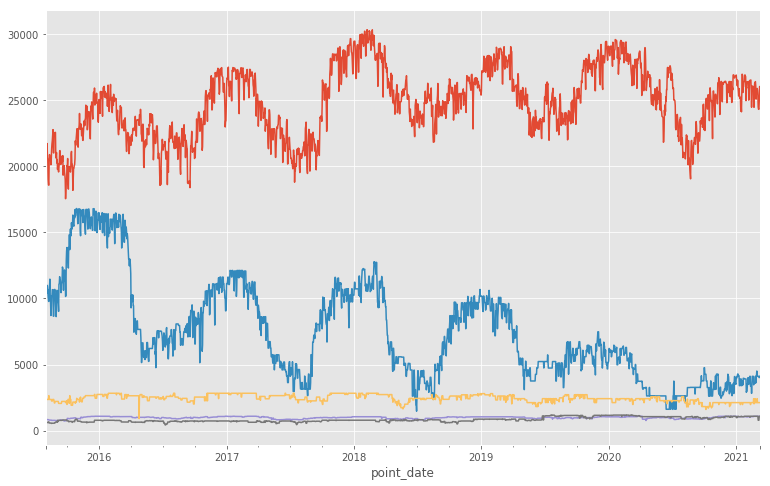

In [151]:
for curve in curves:
    df.loc[curve].groupby(level=1).last()['value'].plot(figsize=figsize)

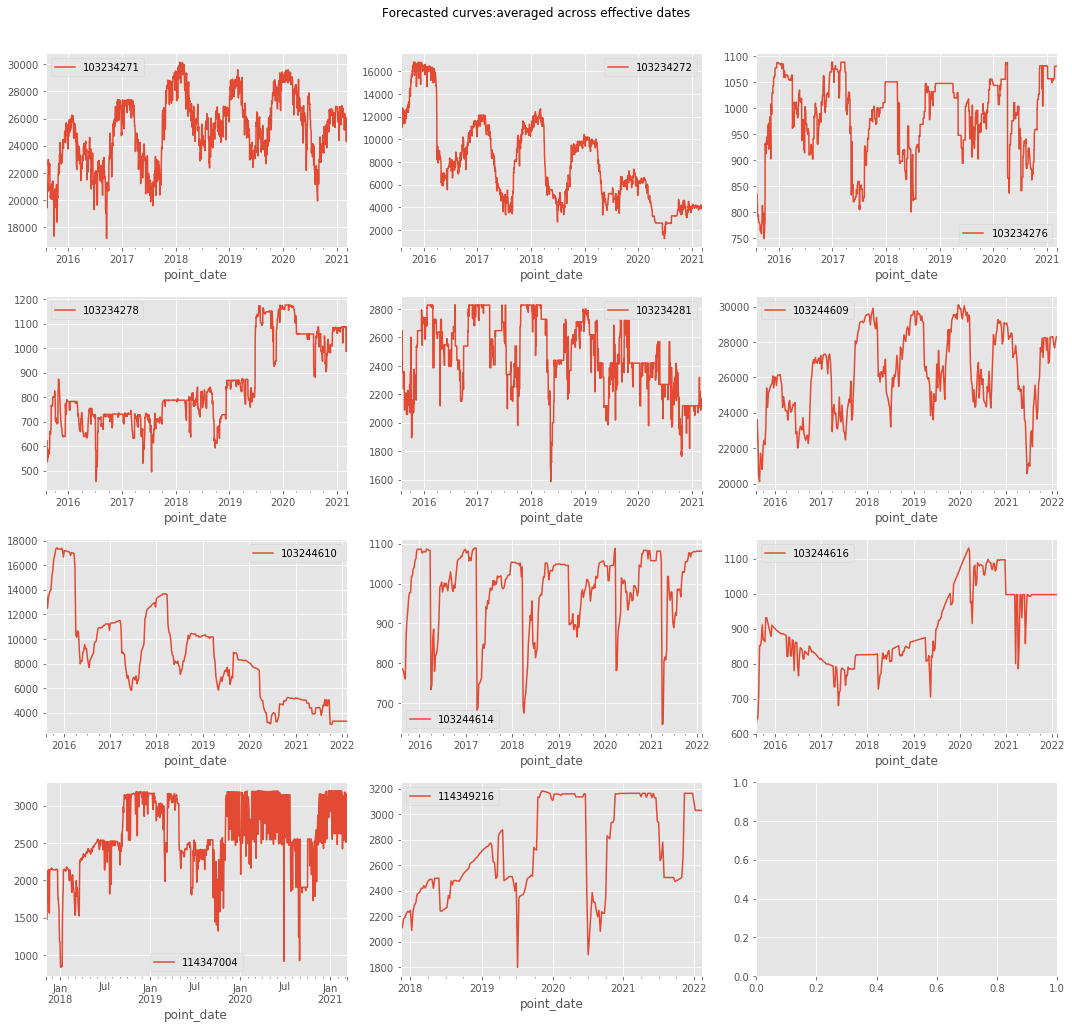

In [24]:
myData.plot_historical_forecasts(df)